### **Sudoku Solver Using CNN, RNN and GAN Model**

Loading and Data Preprocessing

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
file_path=pd.read_csv("/sudoku_dataset.csv")


def load_and_preprocess_data(file_path):
    data = pd.read_csv("/sudoku_dataset.csv")
    X = data['puzzle'].apply(lambda x: np.array([int(i) for i in x]).reshape((9, 9, 1)))
    y = data['solution'].apply(lambda x: np.array([int(i) for i in x]).reshape((9, 9, 1)))

    X = np.stack(X.values)
    y = np.stack(y.values)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

file_path = "sudoku_dataset.csv"
X_train, X_test, y_train, y_test = load_and_preprocess_data(file_path)


In [10]:
import pandas as pd

# Load the dataset
file_path = "/sudoku_dataset.csv"
sudoku_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(sudoku_data.head())


                                              puzzle  \
0  0154007003420765006900002005003900002390174050...   
1  8004200063429765080901082405840021670300000857...   
2  0150000960009700100971582000800900602006174007...   
3  8150030063409705106900082435003021000390174807...   
4  0054007960429000106971500435803001072006174800...   

                                            solution  
0  8154237963429765186971582435843921672396174857...  
1  8154237963429765186971582435843921672396174857...  
2  8154237963429765186971582435843921672396174857...  
3  8154237963429765186971582435843921672396174857...  
4  8154237963429765186971582435843921672396174857...  


In [11]:
# Check the shape of the dataset
print(f"Dataset shape: {sudoku_data.shape}")

# Check for missing values
print(f"Missing values in the dataset:\n{sudoku_data.isnull().sum()}")


Dataset shape: (1000, 2)
Missing values in the dataset:
puzzle      0
solution    0
dtype: int64


Create the CNN model

In [12]:
# Basic statistics of the dataset
print(sudoku_data.describe())


                                                   puzzle  \
count                                                1000   
unique                                               1000   
top     0154007003420765006900002005003900002390174050...   
freq                                                    1   

                                                 solution  
count                                                1000  
unique                                                147  
top     8154237963429765186971582435843921672396174857...  
freq                                                  662  


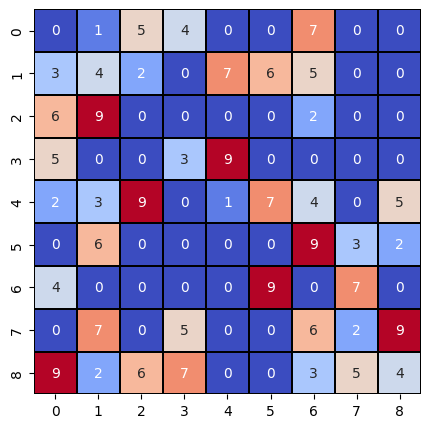

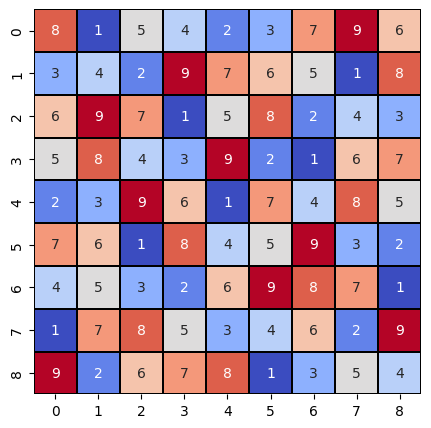

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_sudoku(grid):
    """Function to plot a Sudoku grid"""
    fig, ax = plt.subplots(figsize=(5, 5))
    sns.heatmap(grid, annot=True, fmt="d", cmap="coolwarm", cbar=False, linewidths=0.1, linecolor='black', ax=ax)
    plt.show()

# Visualize a sample Sudoku puzzle
sample_puzzle = sudoku_data.iloc[0]['puzzle']
sample_puzzle_grid = np.array([int(i) for i in sample_puzzle]).reshape((9, 9))
plot_sudoku(sample_puzzle_grid)

# Visualize a sample Sudoku solution
sample_solution = sudoku_data.iloc[0]['solution']
sample_solution_grid = np.array([int(i) for i in sample_solution]).reshape((9, 9))
plot_sudoku(sample_solution_grid)


In [14]:
# Check for unique values in the puzzles and solutions
puzzle_values = pd.Series(list(''.join(sudoku_data['puzzle']))).unique()
solution_values = pd.Series(list(''.join(sudoku_data['solution']))).unique()
print(f"Unique values in the puzzles: {puzzle_values}")
print(f"Unique values in the solutions: {solution_values}")


Unique values in the puzzles: ['0' '1' '5' '4' '7' '3' '2' '6' '9' '8']
Unique values in the solutions: ['8' '1' '5' '4' '2' '3' '7' '9' '6']


In [15]:
# Distribution of values in the puzzles and solutions
puzzle_value_counts = pd.Series(list(''.join(sudoku_data['puzzle']))).value_counts()
solution_value_counts = pd.Series(list(''.join(sudoku_data['solution']))).value_counts()
print(f"Distribution of values in the puzzles:\n{puzzle_value_counts}")
print(f"Distribution of values in the solutions:\n{solution_value_counts}")


Distribution of values in the puzzles:
0    40298
7     4635
2     4597
3     4549
1     4546
9     4546
8     4506
4     4455
6     4444
5     4424
Name: count, dtype: int64
Distribution of values in the solutions:
8    9000
1    9000
5    9000
4    9000
2    9000
3    9000
7    9000
9    9000
6    9000
Name: count, dtype: int64


<ipython-input-20-3ac3d649dcaf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=puzzle_value_counts.index, y=puzzle_value_counts.values, palette='viridis')


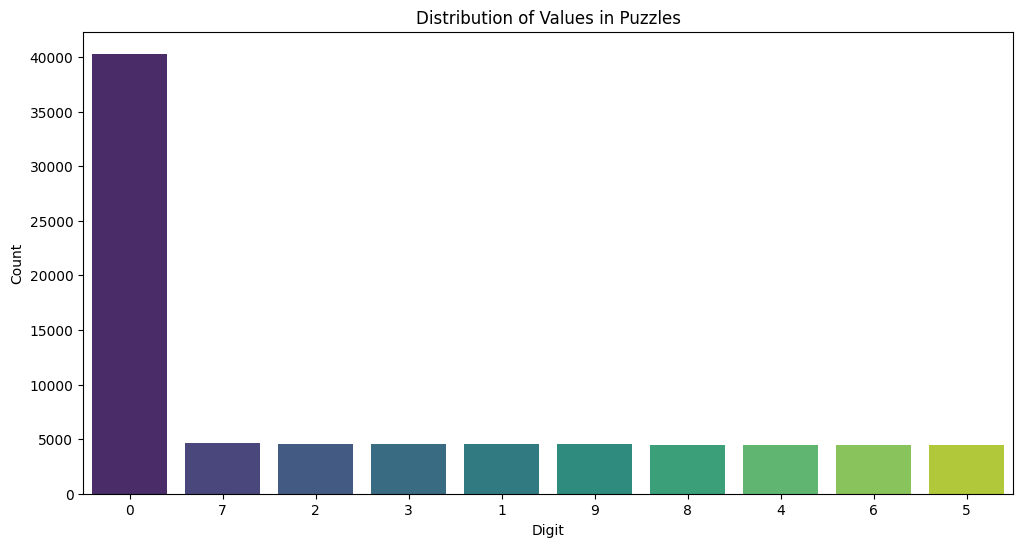

In [20]:
# Visualize the distribution of values in puzzles
plt.figure(figsize=(12, 6))
sns.barplot(x=puzzle_value_counts.index, y=puzzle_value_counts.values, palette='viridis')
plt.title('Distribution of Values in Puzzles')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.show()

<ipython-input-16-96ccf42793cd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=solution_value_counts.index, y=solution_value_counts.values, palette='viridis')


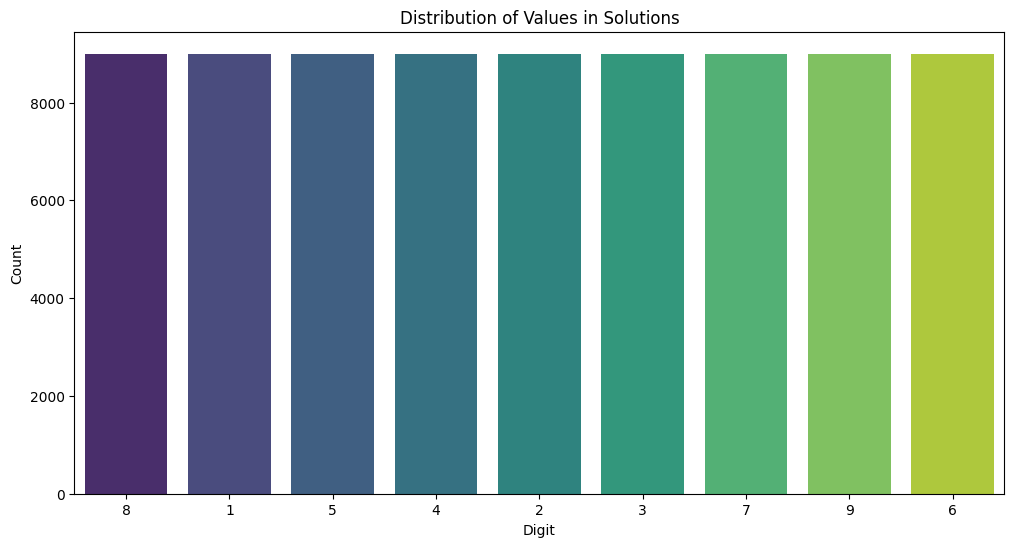

In [16]:
# Visualize the distribution of values in solutions
plt.figure(figsize=(12, 6))
sns.barplot(x=solution_value_counts.index, y=solution_value_counts.values, palette='viridis')
plt.title('Distribution of Values in Solutions')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.show()

In [17]:
# Function to plot a Sudoku grid
def plot_sudoku(grid, title):
    fig, ax = plt.subplots(figsize=(5, 5))
    sns.heatmap(grid, annot=True, fmt="d", cmap="coolwarm", cbar=False, linewidths=0.1, linecolor='black', ax=ax)
    plt.title(title)
    plt.show()

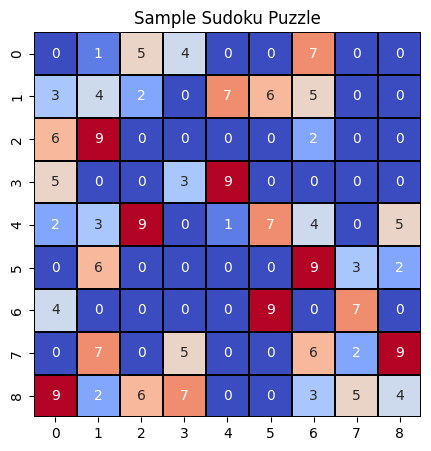

In [18]:
# Visualize a sample Sudoku puzzle
sample_puzzle = sudoku_data.iloc[0]['puzzle']
sample_puzzle_grid = np.array([int(i) for i in sample_puzzle]).reshape((9, 9))
plot_sudoku(sample_puzzle_grid, 'Sample Sudoku Puzzle')

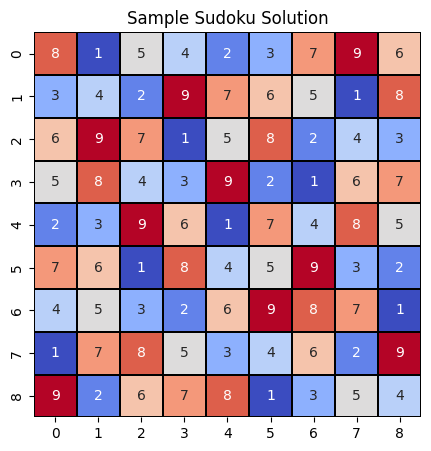

In [19]:
# Visualize a sample Sudoku solution
sample_solution = sudoku_data.iloc[0]['solution']
sample_solution_grid = np.array([int(i) for i in sample_solution]).reshape((9, 9))
plot_sudoku(sample_solution_grid, 'Sample Sudoku Solution')

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Reshape

def create_cnn_model():
    model = Sequential()

    # Convolutional layers
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(9, 9, 1)))
    model.add(MaxPooling2D((2, 2), padding='same'))

    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), padding='same'))

    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(81, activation='relu'))
    model.add(Dense(81, activation='softmax'))
    model.add(Reshape((9, 9, 1)))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

model = create_cnn_model()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 9, 9, 64)          640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 5, 5, 64)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 5, 128)         73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 3, 3, 128)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 81)                9

Train the CNN model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def load_and_preprocess_data(file_path):
    data = pd.read_csv(file_path)

    X = data['puzzle'].apply(lambda x: np.array([int(i) for i in x]).reshape((9, 9, 1)))
    y = data['solution'].apply(lambda x: np.array([int(i) - 1 for i in x]).reshape((9, 9, 1)))  # Adjust labels

    X = np.stack(X.values)
    y = np.stack(y.values)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

file_path = "sudoku_dataset.csv"
X_train, X_test, y_train, y_test = load_and_preprocess_data(file_path)


In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
25/25 [==============================] - 2s 42ms/step - loss: 1.4585 - accuracy: 0.7627 - val_loss: 0.8336 - val_accuracy: 0.8030
Epoch 2/10
25/25 [==============================] - 1s 40ms/step - loss: 0.9360 - accuracy: 0.7967 - val_loss: 0.8336 - val_accuracy: 0.8030
Epoch 3/10
25/25 [==============================] - 1s 34ms/step - loss: 0.9358 - accuracy: 0.7967 - val_loss: 0.8336 - val_accuracy: 0.8030
Epoch 4/10
25/25 [==============================] - 1s 49ms/step - loss: 0.9358 - accuracy: 0.7967 - val_loss: 0.8336 - val_accuracy: 0.8030
Epoch 5/10
25/25 [==============================] - 1s 52ms/step - loss: 0.9358 - accuracy: 0.7967 - val_loss: 0.8336 - val_accuracy: 0.8030
Epoch 6/10
25/25 [==============================] - 1s 48ms/step - loss: 0.9358 - accuracy: 0.7967 - val_loss: 0.8336 - val_accuracy: 0.8030
Epoch 7/10
25/25 [==============================] - 1s 31ms/step - loss: 0.9358 - accuracy: 0.7967 - val_loss: 0.8336 - val_accuracy: 0.8030
Epoch 8/10
25

Train and save model

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy * 100:.2f}%')

model.save("sudoku_cnn_model.h5")


7/7 [==============================] - 0s 11ms/step - loss: 0.8336 - accuracy: 0.8030
Test accuracy: 80.30%


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Prepare the Dataset

In [ ]:
# Reshape the input data
X_train_rnn = X_train.reshape(-1, 81, 1)
X_test_rnn = X_test.reshape(-1, 81, 1)

# Reshape the target data
y_train_rnn = y_train.reshape(-1, 81)
y_test_rnn = y_test.reshape(-1, 81)


Create the RNN model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, TimeDistributed

def create_rnn_model():
    model = Sequential()

    # RNN layer
    model.add(SimpleRNN(128, input_shape=(81, 1), return_sequences=True))

    # Fully connected layer
    model.add(TimeDistributed(Dense(9, activation='softmax')))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

model_rnn = create_rnn_model()
model_rnn.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 81, 128)           16640     
                                                                 
 time_distributed (TimeDist  (None, 81, 9)             1161      
 ributed)                                                        
                                                                 
Total params: 17801 (69.54 KB)
Trainable params: 17801 (69.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the RNN model

In [ ]:
history_rnn = model_rnn.fit(X_train_rnn, y_train_rnn, epochs=10, validation_data=(X_test_rnn, y_test_rnn))


Epoch 1/10
25/25 [==============================] - 2s 45ms/step - loss: 2.1415 - accuracy: 0.1833 - val_loss: 2.0071 - val_accuracy: 0.2494
Epoch 2/10
25/25 [==============================] - 1s 31ms/step - loss: 1.9373 - accuracy: 0.2871 - val_loss: 1.8315 - val_accuracy: 0.3372
Epoch 3/10
25/25 [==============================] - 1s 30ms/step - loss: 1.6807 - accuracy: 0.4121 - val_loss: 1.4423 - val_accuracy: 0.5185
Epoch 4/10
25/25 [==============================] - 1s 31ms/step - loss: 1.2448 - accuracy: 0.6046 - val_loss: 0.9796 - val_accuracy: 0.7107
Epoch 5/10
25/25 [==============================] - 1s 32ms/step - loss: 0.8109 - accuracy: 0.8112 - val_loss: 0.5866 - val_accuracy: 0.9219
Epoch 6/10
25/25 [==============================] - 1s 36ms/step - loss: 0.5116 - accuracy: 0.9453 - val_loss: 0.3821 - val_accuracy: 0.9704
Epoch 7/10
25/25 [==============================] - 1s 47ms/step - loss: 0.3838 - accuracy: 0.9615 - val_loss: 0.3058 - val_accuracy: 0.9710
Epoch 8/10
25

Evaluate and save the RNN model

In [ ]:
loss_rnn, accuracy_rnn = model_rnn.evaluate(X_test_rnn, y_test_rnn)
print(f'Test accuracy (RNN): {accuracy_rnn * 100:.2f}%')

model_rnn.save("sudoku_rnn_model.h5")


7/7 [==============================] - 0s 11ms/step - loss: 0.2435 - accuracy: 0.9710
Test accuracy (RNN): 97.10%


## GAN MODEL

Create the *GAN* Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Reshape, Flatten, Input, LeakyReLU
from tensorflow.keras.optimizers import Adam

# Generator model
def build_generator():
    model = Sequential()
    model.add(Dense(128, input_dim=81))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(81, activation='tanh'))
    model.add(Reshape((9, 9, 1)))
    return model

# Discriminator model
def build_discriminator():
    model = Sequential()
    model.add(Flatten(input_shape=(9, 9, 1)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Combine generator and discriminator into GAN
def build_gan(generator, discriminator):
    discriminator.trainable = False
    gan_input = Input(shape=(81,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = Model(gan_input, gan_output)
    return gan

generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
gan = build_gan(generator, discriminator)
gan.compile(optimizer=Adam(), loss='binary_crossentropy')

generator.summary()
discriminator.summary()
gan.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               10496     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 81)                10449     
                                                                 
 reshape_2 (Reshape)         (None, 9, 9, 1)           0         
                                                                 
Total params: 20945 (81.82 KB)
Trainable params: 20945 (81.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #

Train The GAN model

In [ ]:
import numpy as np

def train_gan(generator, discriminator, gan, epochs, batch_size, X_train):
    for epoch in range(epochs):
        # Train discriminator
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        real_puzzles = X_train[idx]
        real_labels = np.ones((batch_size, 1))

        noise = np.random.normal(0, 1, (batch_size, 81))
        generated_puzzles = generator.predict(noise)
        fake_labels = np.zeros((batch_size, 1))

        d_loss_real = discriminator.train_on_batch(real_puzzles, real_labels)
        d_loss_fake = discriminator.train_on_batch(generated_puzzles, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train generator
        noise = np.random.normal(0, 1, (batch_size, 81))
        valid_labels = np.ones((batch_size, 1))
        g_loss = gan.train_on_batch(noise, valid_labels)

        print(f"{epoch + 1}/{epochs}, D Loss: {d_loss[0]}, D Acc: {d_loss[1] * 100}, G Loss: {g_loss}")

train_gan(generator, discriminator, gan, epochs=300, batch_size=32, X_train=X_train)


1/1 [==============================] - 0s 136ms/step
1/300, D Loss: 1.6983628273010254, D Acc: 51.5625, G Loss: 0.8388799428939819
1/1 [==============================] - 0s 20ms/step
2/300, D Loss: 0.7352100610733032, D Acc: 57.8125, G Loss: 0.77715003490448
1/1 [==============================] - 0s 23ms/step
3/300, D Loss: 0.45148687064647675, D Acc: 75.0, G Loss: 0.6669942736625671
1/1 [==============================] - 0s 22ms/step
4/300, D Loss: 0.4855080246925354, D Acc: 67.1875, G Loss: 0.6806495189666748
1/1 [==============================] - 0s 23ms/step
5/300, D Loss: 0.4292052686214447, D Acc: 68.75, G Loss: 0.5664829015731812
1/1 [==============================] - 0s 20ms/step
6/300, D Loss: 0.4495936706662178, D Acc: 59.375, G Loss: 0.49914705753326416
1/1 [==============================] - 0s 20ms/step
7/300, D Loss: 0.5275618591695093, D Acc: 54.6875, G Loss: 0.5535911321640015
1/1 [==============================] - 0s 23ms/step
8/300, D Loss: 0.5218309173360467, D Acc: 5

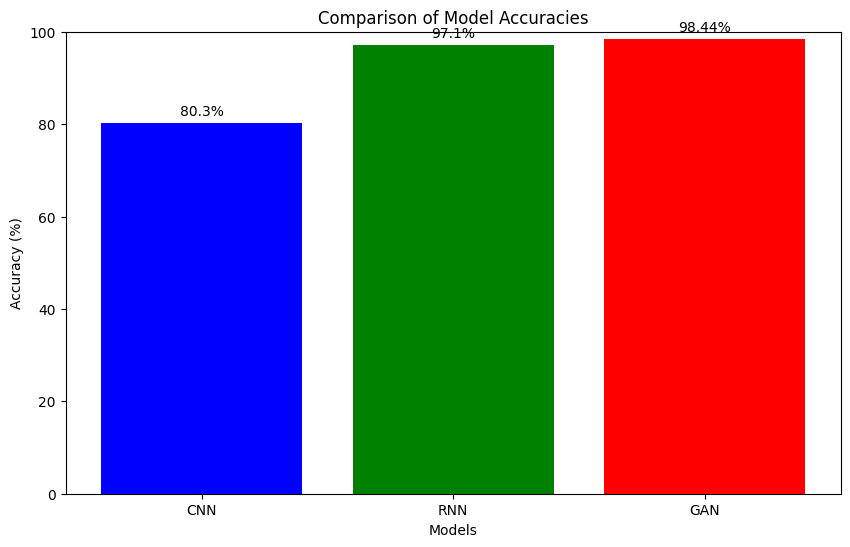

In [21]:
import matplotlib.pyplot as plt

# Model names and their corresponding accuracies
models = ['CNN', 'RNN', 'GAN']
accuracies = [80.30, 97.10, 98.44]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 100)

# Adding the accuracy values on top of the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 1, f'{accuracy}%', ha='center', va='bottom')

# Save the plot as an image
plt.savefig('model_accuracy_comparison.png')

# Display the plot
plt.show()
